In [6]:
# !python --version

source:
https://learnopencv.com/yolo-nas-pose/

In [5]:
# !pip install super-gradients
# !pip install numpy==1.23.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.5/684.5 kB 44.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 78.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 77.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.6/408.6 kB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 7.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to b

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 59.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.0
    Uninstalling numpy-1.23.0:
      Successfully uninstalled numpy-1.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
super-gradients 3.4.0 requires numpy<=1.23, but you have numpy 1.23.5 which is incompatible.


In [1]:
import torch
import os
import pathlib
from super_gradients.training import models
from super_gradients.common.object_names import Models
import cv2
import numpy as np

The console stream is logged into /root/sg_logs/console.log


[2023-11-11 18:28:44] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2023-11-11 18:28:44] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-11-11 18:28:44] INFO - utils.py - NumExpr defaulting to 2 threads.
[2023-11-11 18:28:52] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-11-11 18:28:52] WARNING - export.py - Failed to import pytorch_quantization
[2023-11-11 18:28:52] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization


In [8]:
# def path_list(catalogue_path):
#   paths = []
#   for init_catalague, _, files in os.walk(catalogue_path):
#     for f in files:
#       full_path = os.path.join(init_catalague, f)
#       paths.append(full_path)
#   return paths

In [2]:
urls = [
    "https://mir-s3-cdn-cf.behance.net/project_modules/max_3840/2712bd29493563.55f6ec5e98924.jpg",
    "https://i.pinimg.com/736x/5a/8a/5c/5a8a5c4cd658580ae4719e5c96043541.jpg",
    "https://mir-s3-cdn-cf.behance.net/project_modules/max_1200/4d222729493563.55f6420cd3768.jpg",
    "https://nypost.com/wp-content/uploads/sites/2/2022/06/jiri.jpg",
    "https://www.mmarocks.pl/wp-content/uploads/2022/06/waef3q.jpg",
    "https://a4.espncdn.com/combiner/i?img=%2Fphoto%2F2017%2F0826%2Fr249560_1296x729_16%2D9.jpg",
    "https://mmabnb.pl/wp-content/uploads/2021/05/may-mac-3.jpg",
    "https://cdn.images.express.co.uk/img/dynamic/167/590x/922992_1.jpg",
]

In [3]:
model = models.get("yolo_nas_pose_l", pretrained_weights="coco_pose")
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

[2023-11-11 18:29:02] INFO - checkpoint_utils.py - License Notification: YOLO-NAS-POSE pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS-POSE.md
By downloading the pre-trained weight files you agree to comply with these terms.
Downloading: "https://sghub.deci.ai/models/yolo_nas_pose_l_coco_pose.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_pose_l_coco_pose.pth
100%|██████████| 304M/304M [00:05<00:00, 59.5MB/s]
[2023-11-11 18:29:09] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_pose_l


YoloNASPose_L(
  (backbone): NStageBackbone(
    (stem): YoloNASStem(
      (conv): QARepVGGBlock(
        (nonlinearity): ReLU(inplace=True)
        (se): Identity()
        (branch_3x3): Sequential(
          (conv): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(48, eps=1e-06, momentum=0.03, affine=True, track_running_stats=True)
        )
        (branch_1x1): Conv2d(3, 48, kernel_size=(1, 1), stride=(2, 2))
        (post_bn): BatchNorm2d(48, eps=1e-06, momentum=0.03, affine=True, track_running_stats=True)
        (rbr_reparam): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      )
    )
    (stage1): YoloNASStage(
      (downsample): QARepVGGBlock(
        (nonlinearity): ReLU(inplace=True)
        (se): Identity()
        (branch_3x3): Sequential(
          (conv): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(96, eps=1e-06, momentum=0.03, affin

/usr/local/lib/python3.10/dist-packages/numpy/lib/arraypad.py:487: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(x)
/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
[2023-11-11 18:29:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


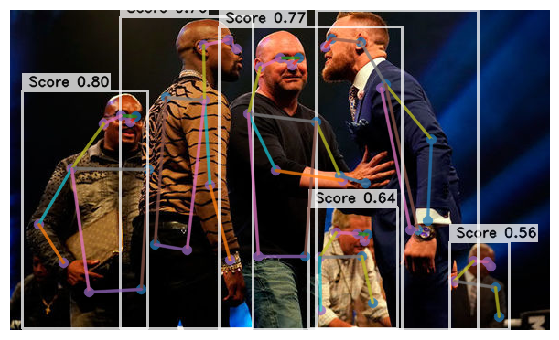

In [4]:
confidence = 0.51
model.predict(urls[7], conf=confidence).show()

In [ ]:
# output_file = pathlib.Path(urls[3]).stem + "-detections" + pathlib.Path(urls[3]).suffix
# model.predict(urls[3], conf=confidence).save(output_file)

In [5]:
pred = model.predict(urls[7], conf=confidence)

[2023-11-11 18:29:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


In [6]:
prediction = pred[0].prediction

The raw predictions will have the following:

- Bounding Box predictions in XYXY format
- Detection scores for the predicted objects
- 17 Keypoint predictions in XY format
- Confidence scores for each of these keypoints

The initial post-processing step should include applying Non-Maximum Suppression to both the box detections and pose predictions, giving you a collection of high-confidence predictions. Then choose the matching boxes and poses, which together form the model output. Since the model is trained to ensure that box detections and pose predictions occur in the same spatial location, their consistency is maintained

In [7]:
bboxes = prediction.bboxes_xyxy # [Num Instances, 4] List of predicted bounding boxes for each object
poses  = prediction.poses       # [Num Instances, Num Joints, 3] list of predicted joints for each detected object (x,y, confidence)
scores = prediction.scores      # [Num Instances] - Confidence value for each predicted instance


In [ ]:
print(poses)

In [ ]:
type(poses)

In [ ]:
# video = path_list("/content/drive/MyDrive/wideło")

In [8]:
video_path = "/content/drive/MyDrive/wideło/clip1.mp4"

In [9]:
arrays_list = []

In [10]:
cap = cv2.VideoCapture(video_path)

# Sprawdź FPS
fps = cap.get(cv2.CAP_PROP_FPS)

print(f'FPS klipu wideo: {fps}')

cap.release()

FPS klipu wideo: 29.97002997002997


In [ ]:
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Error opening video file.")
    exit()


take_every = 10
current_frame = 0

while True:
    ret, frame = cap.read()

    if not ret:
        print("End of video file.")
        break

    if current_frame % take_every == 0:

        pred = model.predict(frame, conf=confidence)
        prediction = pred[0].prediction
        poses  = prediction.poses
        # scores = prediction.scores
        arrays_list.append(poses)


    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# final_array = np.concatenate(arrays_list, axis=0)

[2023-11-11 18:30:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-11-11 18:30:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-11-11 18:30:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-11-11 18:30:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-11-11 18:30:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-11-11 18:30:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-11-11 18:30:45] INFO -

In [36]:
test_array = np.array(arrays_list)

<ipython-input-36-ffb2e80f0f58>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test_array = np.array(arrays_list)


In [37]:
test_array.shape

(1545,)

In [43]:
test_array[500].shape

(1, 17, 3)